# Antenna Position Measurement

Author: Tim Molteno. tim@elec.ac.nz.

The antennas are laid out on three arms which are placed approximately 120 degrees apart.  This notebook will use measurements to infer the actual layout of the antennas.

Arm 1 will point geographically north (NOT magnetic). This arm forms the y-axis and will be used as a reference.

The other reference point is the center of the array. This is assumed to be the point [0,0]. Make sure that a marker is present at this reference point at the same height as the level of the antennas (otherwise the distances will be wrong).

In [1]:
import numpy as np
from scipy.optimize import minimize 

In [2]:
x0 = [0,0]

In [3]:
# pip install pandas
# pip install odfpy

import pandas as pd

#pd.read_excel('three_arm_measurements.ods', engine='odf')
cols = [f"A {i}" for i in range(24)]
data = pd.read_excel('three_arm_measurements.ods', "Sheet1", usecols=cols)
radius = data.loc[0]
radius

A 0      210.0
A 1      410.0
A 2      384.0
A 3      638.0
A 4      212.0
A 5      753.0
A 6     1261.0
A 7     1436.0
A 8     1707.0
A 9     1864.0
A 10    2199.0
A 11    2386.0
A 12     937.0
A 13    1084.0
A 14    1621.0
A 15    1924.0
A 16    2091.0
A 17    2408.0
A 18     914.0
A 19    1254.0
A 20    1575.0
A 21    1696.0
A 22    1856.0
A 23    2076.0
Name: 0, dtype: float64

In [4]:
n_ant = 24
m_0 = np.zeros(24)
m_ij = np.zeros((24,24))

radius = data.loc[0]

for i in range(24):
    m_ij[i,:] = data.loc[i+1]

The following are the measured distances from [x1, x0, x2] from the reference points in millimeters. Note that their order must be the same as the order of the variable called 'reference_points'. In this case, they are x1,x0,x2.

In [5]:
for i in range(n_ant):
    for j in range(n_ant):
        if not np.isnan(m_ij[i,j]):
            m_ij[j,i] = m_ij[i,j]

m_ij


array([[   0.,  198.,  509.,  756.,  365.,  872., 1054., 1225., 1489.,
        1656., 1984., 2183., 1047., 1189., 1718., 2026., 2187., 2506.,
        1027., 1372., 1691., 1814., 1969., 2192.],
       [ 198.,    0.,  673.,  894.,  545., 1021.,  855., 1027., 1293.,
        1459., 1790., 1981., 1170., 1313., 1831., 2132., 2293., 2613.,
        1173., 1506., 1823., 1945., 2098., 2316.],
       [ 509.,  673.,    0.,  258.,  524., 1001., 1467., 1634., 1893.,
        2056., 2384., 2575.,  557.,  701., 1234., 1541., 1705., 2026.,
        1152., 1488., 1807., 1928., 2082., 2305.],
       [ 756.,  894.,  258.,    0.,  772., 1214., 1639., 1802., 2054.,
        2213., 2534., 2721.,  299.,  444.,  976., 1284., 1447., 1768.,
        1357., 1682., 1992., 2113., 2261., 2479.],
       [ 365.,  545.,  524.,  772.,    0.,  535., 1385., 1558., 1819.,
        1984., 2312., 2507., 1066., 1209., 1735., 2042., 2205., 2525.,
         697., 1042., 1366., 1490., 1644., 1867.],
       [ 872., 1021., 1001., 1214.,

In [6]:
radius

A 0      210.0
A 1      410.0
A 2      384.0
A 3      638.0
A 4      212.0
A 5      753.0
A 6     1261.0
A 7     1436.0
A 8     1707.0
A 9     1864.0
A 10    2199.0
A 11    2386.0
A 12     937.0
A 13    1084.0
A 14    1621.0
A 15    1924.0
A 16    2091.0
A 17    2408.0
A 18     914.0
A 19    1254.0
A 20    1575.0
A 21    1696.0
A 22    1856.0
A 23    2076.0
Name: 0, dtype: float64

## Plot the Initial Guess Points

Initial Guesses are from JSON queried from the telescope API. These are converted to millimeters.

In [7]:
import requests
import json

def get_data(path):
    server = "https://tart.elec.ac.nz/rhodes"

    r = requests.get('{}/{}'.format(server, path))
    return json.loads(r.text)

def get_pos():
    return np.array(get_data('api/v1/imaging/antenna_positions'))

if False:
    with open('calibration_data.json', "r") as f:
        data = f.read()
    cal_json = json.loads(data)
    current_pos = cal_json['ant_pos'] # get_pos()
else:
    current_pos = get_pos()


current_pos = np.array(current_pos)


0.0 210.3682210217377
0.0 408.94463668496695
336.5217109276881 -194.29090039225414
551.9521494344621 -318.6697220557791
-181.86395484866577 -104.99920328776716
-650.5866603031461 -375.61638345720115
0.0 1267.4713276669354
0.0 1444.0389909511996
0.0 1710.1964824183096
0.0 1860.515290235969
0.0 2201.4358657407315
0.0 2385.8293756103426
815.9459560468532 -471.0866173678371
943.0748212672769 -544.4845019246204
1402.4770514974723 -809.7205032143381
1668.724062605548 -963.4382867485189
1809.4305611471693 -1044.6752215582535
2084.00692492512 -1203.201959098562
-787.4131193073963 -454.6131763955683
-1083.9902859240754 -625.8420833772044
-1363.9174061185142 -787.4580815749406
-1465.9823431575373 -846.3853004492429
-1608.7564431272458 -928.8159655000605
-1800.0453836437807 -1039.2566868002802


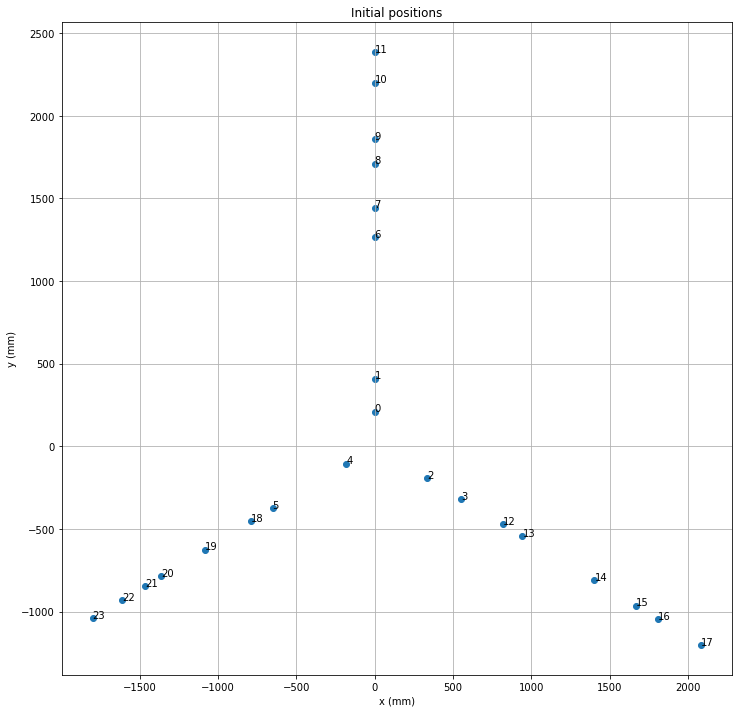

In [8]:
def i_y(i):
    return 2*i+1

def i_x(i):
    return 2*i


initial_guess = np.zeros(2*n_ant)

for i in range(n_ant):
    x,y = current_pos[i][0:2]*1000
    initial_guess[i_x(i)] = x
    initial_guess[i_y(i)] = y
    
    print(x,y)
initial_guess

pos_i = current_pos*1000
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,12))

ax.scatter(pos_i[:,0], pos_i[:,1])
for i in range(0,pos_i.shape[0]):
    ax.text(pos_i[i,0], pos_i[i,1],f"{i}")

ax.grid(True)
ax.set_title('Initial positions')
ax.set_xlabel('x (mm)')
ax.set_ylabel('y (mm)')
plt.savefig('initial_positions.png')
plt.show()

## Criteria for Optimality

The function below is minimized when the positions (in variable x) are consistent with the measured distances m[i,j]. The initial value of this function is more than 3 million.

Note that the x input is a 1D vector of with 48 entries as [p0.x, p0.y, p1.x, p1.y]

In [9]:
def dist(a,b):
    return np.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)


def p(x, i):
    return [x[i_x(i)],x[i_y(i)]]

max_err = 70
def bounds():
    ret = [(0,0)]*48
    for i in range(24):
        _x,_y = pos_i[i,0], pos_i[i,1]
        ret[i_x(i)] = (_x - max_err, _x + max_err)
        ret[i_y(i)] = (_y - max_err, _y + max_err)
    # x-component of the north arm set to zero.
    for i in [11]: # 0,1,6,7,8,9,10,11]:
        xval = pos_i[i,0]
        ret[i_x(i)] = ( - 2, + 2)
    
    return ret

bnd = bounds()

center = [0,0]

def radius_model(x):
    ret = []
    
    for i in range(n_ant):
        p_i = p(x,i)
        ret.append(dist(center, p_i))
        
    return np.array(ret)

non_nan_ij = []
for i in range(n_ant):
    for j in range(n_ant):
        if not np.isnan(m_ij[i,j]):
            non_nan_ij.append(m_ij[i,j])
non_nan_ij = np.array(non_nan_ij)    

def m_ij_model(x):
    ret = []
    for i in range(n_ant):
        p_i = p(x,i)

        for j in range(n_ant):
            p_j = p(x,j)
            if not np.isnan(m_ij[i,j]):
                ret.append(dist(p_j, p_i))
                
    return np.array(ret)
    
def radius_residual(x):
    predict = radius_model(x)
    return predict - radius

def m_ij_residual(x):
    predict = m_ij_model(x)
    return predict - non_nan_ij


def f(x):
    ret = 0
    for i in range(n_ant):
        p_i = p(x,i)
        ret += (dist(center, p_i) - m_0[i])**2
        for j in range(n_ant):
            p_j = p(x,j)
            if not np.isnan(m_ij[i,j]):
                ret += (dist(p_j, p_i) - m_ij[i,j])**2
    return ret

def f(x):
    ret = np.sum(radius_residual(x)**2)
    ret += np.sum(m_ij_residual(x)**2)
    return ret

#for i in range(48):
#    print(bnd[i])
print(f(initial_guess))
res = minimize(f, initial_guess, bounds=bnd)
res

617089.0794364027


      fun: 24659.599201564626
 hess_inv: <48x48 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 2.54658495e-03,  2.91038074e-03,  1.09139355e-03,  0.00000000e+00,
        4.00177351e-03, -3.63797592e-03,  1.23691181e-02,  7.27595184e-04,
        8.00354703e-03,  7.27596218e-04, -4.36557111e-03, -5.45696388e-03,
        7.27595701e-03,  2.61937244e-02,  7.27595701e-04, -9.82264666e-03,
        0.00000000e+00, -8.00363802e-03,  4.00177636e-03,  2.54661210e-03,
       -1.09139355e-03,  5.82082765e-03, -3.96692487e+02, -3.49249659e-02,
       -7.63974943e-03,  0.00000000e+00, -1.09139278e-03,  4.00177351e-03,
        0.00000000e+00, -6.08196814e+00, -5.09322419e-03, -1.13349871e+02,
       -1.38244657e-02, -1.66170007e+02, -6.54843111e-03, -2.05306412e+02,
       -5.09316629e-03,  1.09139278e-03,  2.18281037e-03, -2.91038074e-03,
        2.18281037e-03,  4.36557111e-03, -4.72942246e-03,  2.18278555e-03,
        1.09140518e-03, -1.52794989e-02,  3.63801728e-04,  7.27603456e-04])


In [10]:
err = res.jac.reshape((24,2))
rms = np.sqrt(np.sum(err**2, axis=1))
for i in range(24):
    print(f"Ant {i}:\tJac: {rms[i]:4.2f}")

Ant 0:	Jac: 0.00
Ant 1:	Jac: 0.00
Ant 2:	Jac: 0.01
Ant 3:	Jac: 0.01
Ant 4:	Jac: 0.01
Ant 5:	Jac: 0.01
Ant 6:	Jac: 0.03
Ant 7:	Jac: 0.01
Ant 8:	Jac: 0.01
Ant 9:	Jac: 0.00
Ant 10:	Jac: 0.01
Ant 11:	Jac: 396.69
Ant 12:	Jac: 0.01
Ant 13:	Jac: 0.00
Ant 14:	Jac: 6.08
Ant 15:	Jac: 113.35
Ant 16:	Jac: 166.17
Ant 17:	Jac: 205.31
Ant 18:	Jac: 0.01
Ant 19:	Jac: 0.00
Ant 20:	Jac: 0.00
Ant 21:	Jac: 0.01
Ant 22:	Jac: 0.02
Ant 23:	Jac: 0.00


The optimized positions are now known. The final value of the function is 32. Far closer to zero than 3 million!

We can recover the x,y coordinates by reshaping the array

In [11]:
pos = res.x.reshape((24,2))
pos

array([[-1.58889282e+01,  1.88610739e+02],
       [-1.07248997e+01,  3.86943543e+02],
       [ 3.24404347e+02, -1.92435299e+02],
       [ 5.55915092e+02, -3.05658563e+02],
       [-1.95685105e+02, -1.27521180e+02],
       [-6.55268373e+02, -4.03169018e+02],
       [ 1.35500104e+01,  1.23952584e+03],
       [ 2.07661837e+01,  1.41204605e+03],
       [ 2.98117746e+01,  1.67538611e+03],
       [ 3.22257304e+01,  1.84062637e+03],
       [ 4.10906032e+01,  2.16968738e+03],
       [ 2.00000000e+00,  2.36524006e+03],
       [ 8.24946887e+02, -4.37741183e+02],
       [ 9.52905072e+02, -5.03179648e+02],
       [ 1.43005529e+03, -7.39720503e+02],
       [ 1.69301964e+03, -8.93438287e+02],
       [ 1.83309789e+03, -9.74675222e+02],
       [ 2.10939084e+03, -1.13320196e+03],
       [-7.87902786e+02, -4.90835875e+02],
       [-1.08452653e+03, -6.68046420e+02],
       [-1.36268503e+03, -8.32944955e+02],
       [-1.46852179e+03, -8.96909634e+02],
       [-1.60070704e+03, -9.78832215e+02],
       [-1.

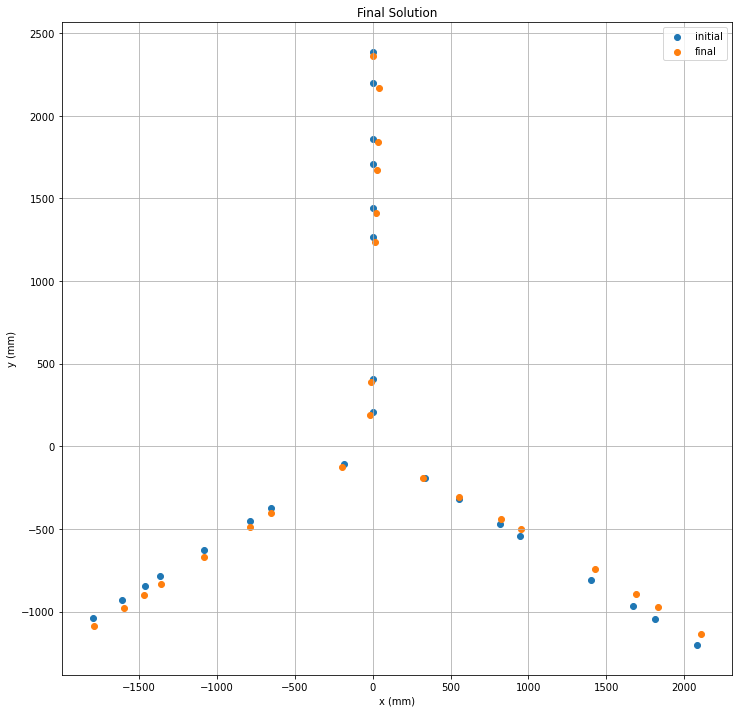

In [12]:
fig, ax = plt.subplots(figsize=(12,12))

ax.scatter(pos_i[:,0], pos_i[:,1], label='initial')
ax.scatter(pos[:,0], pos[:,1], label='final')

ax.grid(True)
ax.set_title('Final Solution')
ax.set_xlabel('x (mm)')
ax.set_ylabel('y (mm)')
ax.legend()
plt.savefig('final_positions.png')
plt.show()

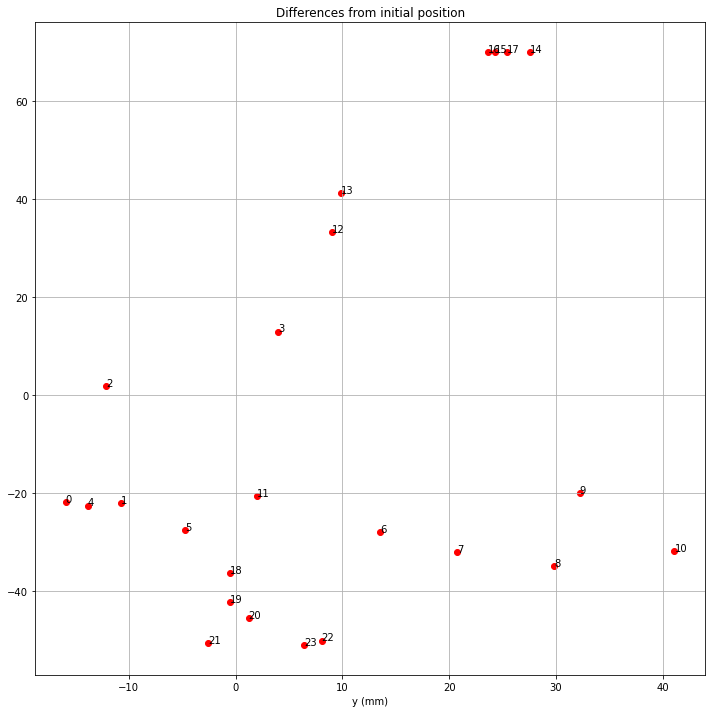

In [13]:
# Differences plot
diff = pos - pos_i[:,0:2]


fig, ax = plt.subplots(figsize=(12,12))

ax.scatter(diff[:,0], diff[:,1], color='red')

for i in range(0,diff.shape[0]):
    ax.text(diff[i,0], diff[i,1],f"{i}")

ax.grid(True)
ax.set_title("Differences from initial position")
ax.set_xlabel('x (mm)')
ax.set_xlabel('y (mm)')
plt.savefig('differences.png')
plt.show()

In [14]:
# Residual plot
rres = radius_residual(res.x)
rres

A 0    -20.721187
A 1    -22.907855
A 2     -6.813673
A 3     -3.595754
A 4     21.568644
A 5     16.364607
A 6    -21.400097
A 7    -23.801262
A 8    -31.348676
A 9    -23.091550
A 10   -28.923558
A 11   -20.759095
A 12    -3.107763
A 13    -6.401821
A 14   -10.955104
A 15    -9.699224
A 16   -14.888330
A 17   -13.490360
A 18    14.283716
A 19    19.767567
A 20    22.093547
A 21    24.756562
A 22    20.266383
A 23    22.960209
Name: 0, dtype: float64

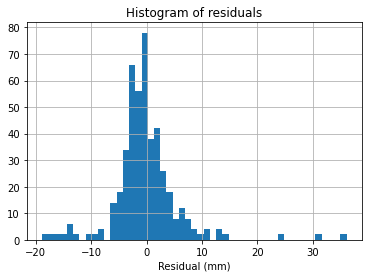

In [15]:
# ij resdual
ijres = m_ij_residual(res.x)
plt.hist(ijres, bins='fd');
plt.title("Histogram of residuals")
plt.xlabel("Residual (mm)")
plt.grid(True)
plt.savefig("residual_histogram.png")

The API expects 3D coordinates (with a z value which is zero in this case). Therefore we add a column of zeros.

In [16]:
result = np.zeros((n_ant, 3))
result[:,:-1] = np.round(pos/1000.0, 3)
result

array([[-1.600e-02,  1.890e-01,  0.000e+00],
       [-1.100e-02,  3.870e-01,  0.000e+00],
       [ 3.240e-01, -1.920e-01,  0.000e+00],
       [ 5.560e-01, -3.060e-01,  0.000e+00],
       [-1.960e-01, -1.280e-01,  0.000e+00],
       [-6.550e-01, -4.030e-01,  0.000e+00],
       [ 1.400e-02,  1.240e+00,  0.000e+00],
       [ 2.100e-02,  1.412e+00,  0.000e+00],
       [ 3.000e-02,  1.675e+00,  0.000e+00],
       [ 3.200e-02,  1.841e+00,  0.000e+00],
       [ 4.100e-02,  2.170e+00,  0.000e+00],
       [ 2.000e-03,  2.365e+00,  0.000e+00],
       [ 8.250e-01, -4.380e-01,  0.000e+00],
       [ 9.530e-01, -5.030e-01,  0.000e+00],
       [ 1.430e+00, -7.400e-01,  0.000e+00],
       [ 1.693e+00, -8.930e-01,  0.000e+00],
       [ 1.833e+00, -9.750e-01,  0.000e+00],
       [ 2.109e+00, -1.133e+00,  0.000e+00],
       [-7.880e-01, -4.910e-01,  0.000e+00],
       [-1.085e+00, -6.680e-01,  0.000e+00],
       [-1.363e+00, -8.330e-01,  0.000e+00],
       [-1.469e+00, -8.970e-01,  0.000e+00],
       [-1

In [17]:
json_result = {}
json_result["antenna_positions"] = result.tolist()
print(json.dumps(json_result, indent=4, separators=(',', ': ')))

{
    "antenna_positions": [
        [
            -0.016,
            0.189,
            0.0
        ],
        [
            -0.011,
            0.387,
            0.0
        ],
        [
            0.324,
            -0.192,
            0.0
        ],
        [
            0.556,
            -0.306,
            0.0
        ],
        [
            -0.196,
            -0.128,
            0.0
        ],
        [
            -0.655,
            -0.403,
            0.0
        ],
        [
            0.014,
            1.24,
            0.0
        ],
        [
            0.021,
            1.412,
            0.0
        ],
        [
            0.03,
            1.675,
            0.0
        ],
        [
            0.032,
            1.841,
            0.0
        ],
        [
            0.041,
            2.17,
            0.0
        ],
        [
            0.002,
            2.365,
            0.0
        ],
        [
            0.825,
            -0.438,
            0.0
 

The position file above is in a format suitable for uploading to the telescope api. Also for using as the calibrated_antenna_positions.json file in TART/software/containers/telescope_web_api/config_data.


    tart_upload_antenna_positions --api https://tart.elec.ac.nz/rhodes --pw=xxxx --file rhodes_antenna_positions.json
